# Predict the Score of a student based on number of study hours.

### Using Simple Linear Regression we are going to predict Score of Student

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# reading data from url
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


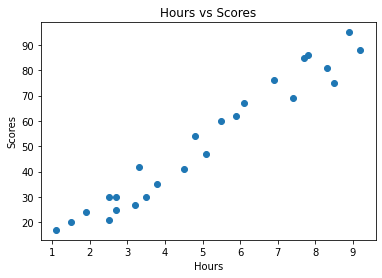

In [4]:
# plotting distribution of scores
plt.title("Hours vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores)

## From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [5]:
# divide the data into "attributes" (inputs) and "labels" (outputs).
X= df.iloc[:,:-1].values
y= df.iloc[:, 1].values 

In [6]:
# split this data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# training the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train , y_train)
print('training complete')

training complete


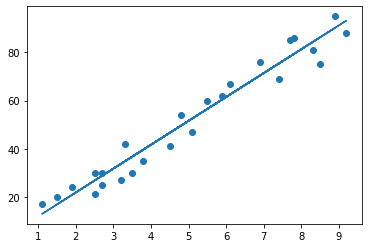

In [8]:
# plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [9]:
# Comparing Actual vs Predicted Scores
pred=regressor.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,'Predicted':pred})  
df1.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
# calculating accuracy score of model
regressor.score(X_train, y_train)

0.9515510725211552

### What will be predicted score if a student studies for 9.25 hrs/day?

In [11]:
regressor.coef_

array([9.91065648])

In [12]:
regressor.intercept_

2.0181600414346974

In [13]:
# calculating predicted score using simple linear equation  y= m x + c 
# where  m = Coefficient , c = Intercept, x = Hours, y = Score
Score= 9.91065648 * 9.25 + 2.0181600414346974
Score

93.6917324814347

In [14]:
# calculating predicted score using Linear Regression 
regressor.predict([[9.25]])

array([93.69173249])

### No of Hours = 9.25
### Predicted Score = 93.69173249

In [15]:
# Evaluating the model using metrics 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406


## Thank you!!